<a href="https://colab.research.google.com/github/OracyC/douban_moive_data_analysis/blob/master/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
import matplotlib as mpl

zhfont = mpl.font_manager.FontProperties(fname='chinese.simhei.ttf')

In [ ]:
files = "https://github.com/OracyC/douban_moive_data_analysis/raw/master/data.zip" 
!rm -rf * && pip install git+https://github.com/data-8/Gofer-Grader && wget $files && unzip -o data.zip

  Cloning https://github.com/data-8/Gofer-Grader to /tmp/pip-req-build-kwmhxw5z
  Running command git clone -q https://github.com/data-8/Gofer-Grader /tmp/pip-req-build-kwmhxw5z
  Created wheel for gofer-grader: filename=gofer_grader-1.0.9-cp36-none-any.whl size=10171 sha256=dd710666c250d95ef8b82258c560b866b0e08d77acb93af9230979dddf27cff6
  Stored in directory: /tmp/pip-ephem-wheel-cache-e866wu1_/wheels/9e/62/24/8563ae039051d6ba979557d1766bfebbda5dd08f8572e3e35d
Successfully built gofer-grader
--2020-11-07 14:29:17--  https://github.com/OracyC/douban_moive_data_analysis/raw/master/data.zip
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/OracyC/douban_moive_data_analysis/master/data.zip [following]
--2020-11-07 14:29:18--  https://raw.githubusercontent.com/OracyC/douban_moive_data_analysis/master/data.zip
Resolving raw.gith

In [ ]:
data = pd.read_csv('douban_movie_top250.csv')

In [ ]:
data.head()

,movie_name,movie_date,movie_description,movie_rate,movie_director,movie_type,movie_lanuage,movie_star
0,肖申克的救赎,1994,希望让人自由。,794808人评价,弗兰克·德拉邦特 Frank Darabont,犯罪 剧情,美国,9.6
1,这个杀手不太冷,1994,怪蜀黍和小萝莉不得不说的故事。,762932人评价,吕克·贝松 Luc Besson,剧情 动作 犯罪,法国,9.4
2,霸王别姬,1993,风华绝代。,560714人评价,陈凯歌 Kaige Chen,剧情 爱情 同性,中国大陆 香港,9.5
3,阿甘正传,1994,一部美国近现代史。,657190人评价,Robert Zemeckis,剧情 爱情,美国,9.4
4,美丽人生,1997,最美的谎言。,379377人评价,罗伯托·贝尼尼 Roberto Benigni,剧情 喜剧 爱情 战争,意大利,9.5


In [ ]:
data.describe()

,movie_date,movie_star
count,250.000000,250.000000
mean,1997.996000,8.749200
std,15.314769,0.278874
min,1931.000000,8.200000
25%,1994.000000,8.600000
50%,2001.000000,8.700000
75%,2008.000000,8.900000
max,2015.000000,9.600000


# **EDA**

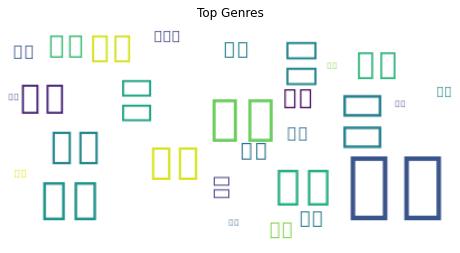

In [ ]:
wordcloud_genres = WordCloud(max_font_size=80, max_words=100, background_color="white", collocations=False).generate(data['movie_type'].to_string())
plt.figure(figsize = (8, 6))
plt.imshow(wordcloud_genres, interpolation="bilinear")
plt.title("Top Genres")
plt.axis("off")
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 32654 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27861 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flag

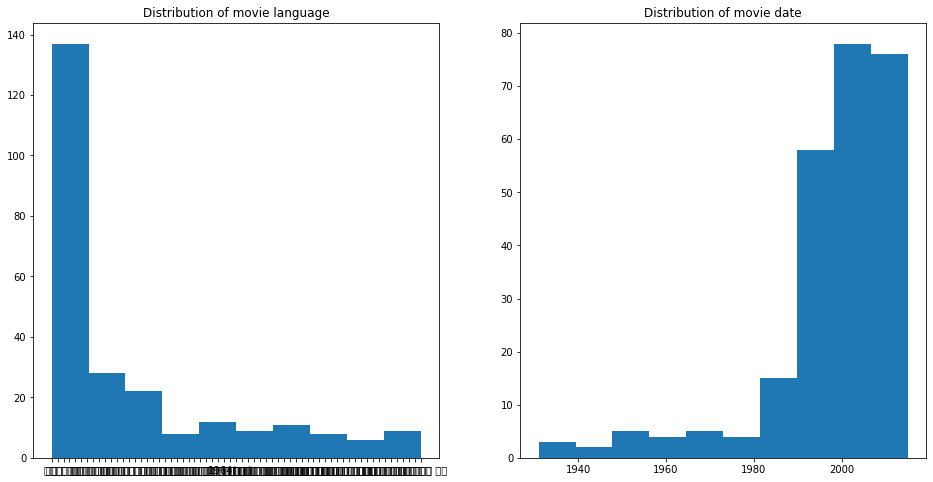

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.hist(data['movie_lanuage']);
plt.title('Distribution of movie language');
plt.subplot(1, 2, 2)
plt.hist(data['movie_date']);
plt.title('Distribution of movie date');